## MLP Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Loading of Data

In [2]:
# Load data
df = pd.read_excel("1.5 MLD (Outlet BOD).xlsx")

### Seperating X and Y

In [3]:
# Separate X and y
y = df['STP_Outlet-BOD_U']
x = df.drop('STP_Outlet-BOD_U', axis=1)

# Data preprocessing: Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

# Hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(32, 64, 64), (64, 128, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [200, 300],
    'batch_size': [16, 32],
}

### Training and Testing of Data

In [4]:
mlp_model = MLPRegressor(random_state=50)
grid_search = GridSearchCV(mlp_model, param_grid, cv=7, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(x_train, y_train)

# Predict on testing set and training set
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

### Print metrics for both sets

### Create a scatter plot with a regression line

C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


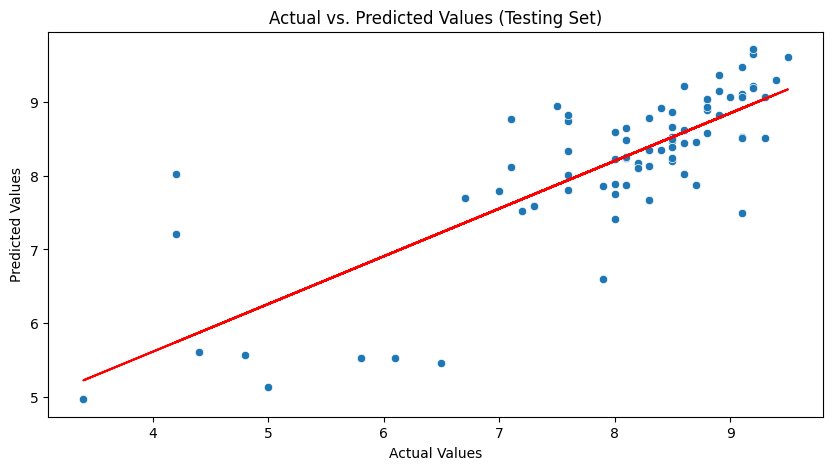

In [6]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test, y_pred_test)
plt.plot(y_test, regression_line.intercept + regression_line.slope * y_test, color='red')

plt.show()

C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


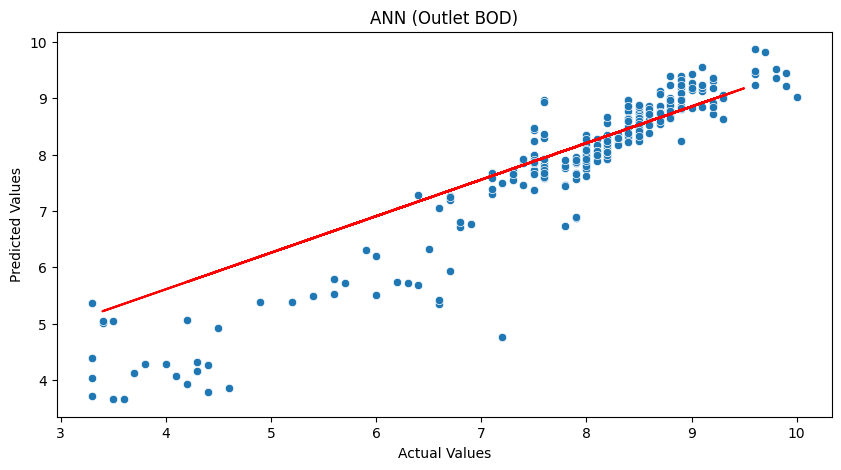

In [8]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('ANN (Outlet BOD)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test, y_pred_test)
plt.plot(y_test, regression_line.intercept + regression_line.slope * y_test, color='red')

plt.show()

## For COD

In [9]:
# Separate X and y
y = df['STP_Outlet-BOD_U']
x = df.drop('STP_Outlet-BOD_U', axis=1)

# Data preprocessing: Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

# Hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(32, 64, 100), (64, 128, 200)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [200, 300],
    'batch_size': [16, 32],
}

In [10]:
mlp_model = MLPRegressor(random_state=50)
grid_search = GridSearchCV(mlp_model, param_grid, cv=7, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(x_train, y_train)

# Predict on testing set and training set
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [11]:
# Print metrics for both sets
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 0.18435264840728832
R-squared (R2): 0.8985581160851739

Testing Set Metrics:
Mean Squared Error (MSE): 0.7083098949698791
R-squared (R2): 0.581184772581808


C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


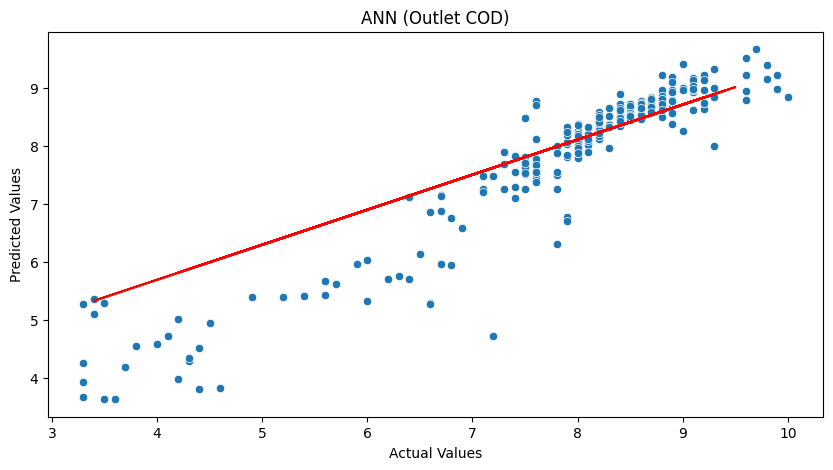

In [12]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('ANN (Outlet COD)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test, y_pred_test)
plt.plot(y_test, regression_line.intercept + regression_line.slope * y_test, color='red')

plt.show()